In [1]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

import tensorflow_io as tfio

import pydicom

import sys

import os

import glob

In [2]:
tf.__version__

'2.1.0'

In [75]:
positive = '/opt/AIStorage/POSITIVEBREAK/'
negative = '/opt/AIStorage/NEGATIVEBREAK/'

In [3]:
ds = pydicom.dcmread('/opt/AIStorage/PLAYGROUND/POSITIVEBREAK/STAI-00000010/STAI-61092579/2.25.156218030057395004118933293784898834122.dcm')

In [5]:
type(ds)

pydicom.dataset.FileDataset

In [76]:


path = positive

files_positive = [f for f in glob.glob(path + "**/*.dcm", recursive=True)]

for f in files_positive:
    print(f)

/opt/AIStorage/PLAYGROUND/POSITIVEBREAK/STAI-00000010/STAI-61092579/2.25.156218030057395004118933293784898834122.dcm
/opt/AIStorage/PLAYGROUND/POSITIVEBREAK/STAI-00000010/STAI-61092579/2.25.14526328268083029875886554782279786117.dcm
/opt/AIStorage/PLAYGROUND/POSITIVEBREAK/STAI-00000010/STAI-61092579/2.25.303176026243598090086020822702268962952.dcm
/opt/AIStorage/PLAYGROUND/POSITIVEBREAK/STAI-00000010/STAI-61092579/2.25.22390557571824079643757647144874154645.dcm
/opt/AIStorage/PLAYGROUND/POSITIVEBREAK/STAI-00000742/STAI-38934887/2.25.116788643284648120584980484609796813054.dcm
/opt/AIStorage/PLAYGROUND/POSITIVEBREAK/STAI-00000742/STAI-38934887/2.25.180063703721282385305673784000766149312.dcm
/opt/AIStorage/PLAYGROUND/POSITIVEBREAK/STAI-00000742/STAI-38934887/2.25.326388384863074476827952303124343033519.dcm
/opt/AIStorage/PLAYGROUND/POSITIVEBREAK/STAI-00000742/STAI-38934887/2.25.283881656814601268954203711490217121787.dcm
/opt/AIStorage/PLAYGROUND/POSITIVEBREAK/STAI-00000742/STAI-3893488

In [77]:
len(files_positive)

4671

In [78]:


path = negative

files_negative = [f for f in glob.glob(path + "**/*.dcm", recursive=True)]

for f in files_negative:
    print(f)

/opt/AIStorage/PLAYGROUND/NEGATIVEBREAK/STAI-00000504/STAI-29603046/2.25.156865527124047584668908230519230018529.dcm
/opt/AIStorage/PLAYGROUND/NEGATIVEBREAK/STAI-00000504/STAI-29603046/2.25.178645522768472924025677789644821703316.dcm
/opt/AIStorage/PLAYGROUND/NEGATIVEBREAK/STAI-00000504/STAI-29603046/2.25.236516363563375154948018020950449095189.dcm
/opt/AIStorage/PLAYGROUND/NEGATIVEBREAK/STAI-00000504/STAI-29603046/2.25.308958536766187709288261718929120511454.dcm
/opt/AIStorage/PLAYGROUND/NEGATIVEBREAK/STAI-00000504/STAI-82227720/2.25.147491058217051930156316734483593173371.dcm
/opt/AIStorage/PLAYGROUND/NEGATIVEBREAK/STAI-00000504/STAI-82227720/2.25.103919930506528469166538716552441229391.dcm
/opt/AIStorage/PLAYGROUND/NEGATIVEBREAK/STAI-00000504/STAI-82227720/2.25.91831411806636957872365003530648598532.dcm
/opt/AIStorage/PLAYGROUND/NEGATIVEBREAK/STAI-00000504/STAI-82227720/2.25.261488100761267777476611295603735078424.dcm
/opt/AIStorage/PLAYGROUND/NEGATIVEBREAK/STAI-00000666/STAI-570433

In [79]:
len(files_negative)

1331

In [80]:
files_positive = set(files_positive)
files_negative = set(files_negative)

In [81]:
len(files_positive)

4671

In [82]:
len(files_negative)

1331

In [83]:


true_positives = set([])
annotations = set([])

count = 0
for file in files_positive:
    count = count + 1
    
    image_bytes = tf.io.read_file(file)

    ds = pydicom.dcmread(file)

    
    #try to access the reference
    try:
        path = os.path.dirname(file)
   
        reference = ds[0x0008,0x1115][0][0x0008,0x1140][0][0x0008,0x1155].value
        
        points = ds[0x0070,0x0001][0][0x0070,0x0009][0][0x0070,0x0021].value
        
        box = ds[0x0070,0x0001][0][0x0070,0x0009][0][0x0070,0x0022].value
        
        
        true_positive = path + '/' + reference + '.dcm'
        
        if int(points) < 5:
            print('not enough points for a box', points)
            print(' i: ', true_positive)
            print(' a: ', file)
            print(' box: ', box)
        if int(points) > 5:
            print('multiple anotation')
            print('total points: ', points)
        true_positives.add(true_positive)
        annotations.add(file)
    except:
        pass
    





not enough points for a box 4
 i:  /opt/AIStorage/PLAYGROUND/POSITIVEBREAK/STAI-00000052/STAI-40941500/2.25.292086773195647879915635245498130392299.dcm
 a:  /opt/AIStorage/PLAYGROUND/POSITIVEBREAK/STAI-00000052/STAI-40941500/2.25.219106796333108613135240819295713287707.dcm
 box:  [979.2979125976562, 1095.0751953125, 979.2979125976562, 1654.7542724609375, 815.8074340820312, 1374.914794921875, 1142.788330078125, 1374.914794921875]


KeyboardInterrupt: 

In [ ]:
len(true_positives)

In [ ]:
len(annotations)

In [ ]:
len(true_positives)

In [ ]:
len(files_positive)

In [ ]:
len(files_negative) + (len(files_positive) - (len(true_positives) + len(annotations)) )

In [ ]:
additional_negatives = files_positive.difference(true_positives.union(annotations))

In [ ]:
len(additional_negatives) + (len(true_positives) + len(annotations))

In [ ]:
additional_negatives

In [ ]:

#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00000053/STAI-04055925/2.25.224007947286034398047615710192988937317.dcm'
#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00000052/STAI-40941500/2.25.63080203794180773981606218174535024916.dcm'
#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00000052/STAI-40941500/2.25.292086773195647879915635245498130392299.dcm'
#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00000008/STAI-88668937/2.25.223693969864563681322883460768261280793.dcm'
#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00000146/STAI-74268112/2.25.240589287173111076941644732354274744894.dcm'
#file = '/opt/AIStorage/POSITIVEBREAK/MelissaPositive/STAI-00000058/STAI-37714750/2.25.286225602791282069514226290124179501949.dcm'
#file = '/opt/AIStorage/POSITIVEBREAK/MelissaPositive/STAI-00000058/STAI-37714750/2.25.331132466683482770161939907987063471605.dcm'
#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00000355/STAI-14022634/2.25.93485946825813646137659092994929831075.dcm'

#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00000571/STAI-71094100/2.25.158763468099384888330544864788867338617.dcm'
#file = '/opt/AIStorage/POSITIVEBREAK/MelissaPositive/STAI-00000064/STAI-84589903/2.25.282776297493013728777667459661773576202.dcm'




#probably a fracture, but no associated annotation
file = '/opt/AIStorage/POSITIVEBREAK/STAI-00001019/STAI-92416959/2.25.130219880488422383881334042430233831363.dcm'

#probably a fracture, but no associated annotation
#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00001019/STAI-92416959/2.25.155068025008568924003375005504400307619.dcm'

#this file is referenced by the annotation dicom
#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00001019/STAI-92416959/2.25.211904290918469145111906856660599393535.dcm'

#possibly a fracture, hard to tell but no associated annotation
#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00001019/STAI-92416959/2.25.51770886480559254455053267736917393446.dcm'

print(file)
image_bytes = tf.io.read_file(file)    
image = tfio.image.decode_dicom_image(contents=image_bytes, dtype=tf.uint16)
lossy_image = tfio.image.decode_dicom_image(image_bytes, scale='auto', on_error='lossy', dtype=tf.uint8)

fig, axes = plt.subplots(1,2, figsize=(30,30))
axes[0].imshow(np.squeeze(image.numpy()), cmap='gray')
axes[0].set_title('image')
axes[1].imshow(np.squeeze(lossy_image.numpy()), cmap='gray')
axes[1].set_title('lossy image');

print('')

image.shape

In [ ]:
#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00000053/STAI-04055925/2.25.224007947286034398047615710192988937317.dcm'
#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00000052/STAI-40941500/2.25.63080203794180773981606218174535024916.dcm'
#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00000052/STAI-40941500/2.25.292086773195647879915635245498130392299.dcm'
#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00000008/STAI-88668937/2.25.223693969864563681322883460768261280793.dcm'
#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00000146/STAI-74268112/2.25.240589287173111076941644732354274744894.dcm'
#file = '/opt/AIStorage/POSITIVEBREAK/MelissaPositive/STAI-00000058/STAI-37714750/2.25.286225602791282069514226290124179501949.dcm'
#file = '/opt/AIStorage/POSITIVEBREAK/MelissaPositive/STAI-00000058/STAI-37714750/2.25.331132466683482770161939907987063471605.dcm'
#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00000355/STAI-14022634/2.25.93485946825813646137659092994929831075.dcm'

#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00000571/STAI-71094100/2.25.158763468099384888330544864788867338617.dcm'
#file = '/opt/AIStorage/POSITIVEBREAK/MelissaPositive/STAI-00000064/STAI-84589903/2.25.282776297493013728777667459661773576202.dcm'




#probably a fracture, but no associated annotation
#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00001019/STAI-92416959/2.25.130219880488422383881334042430233831363.dcm'

#probably a fracture, but no associated annotation
file = '/opt/AIStorage/POSITIVEBREAK/STAI-00001019/STAI-92416959/2.25.155068025008568924003375005504400307619.dcm'

#this file is referenced by the annotation dicom
#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00001019/STAI-92416959/2.25.211904290918469145111906856660599393535.dcm'

#possibly a fracture, hard to tell but no associated annotation
#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00001019/STAI-92416959/2.25.51770886480559254455053267736917393446.dcm'

print(file)
image_bytes = tf.io.read_file(file)    
image = tfio.image.decode_dicom_image(contents=image_bytes, dtype=tf.uint16)
lossy_image = tfio.image.decode_dicom_image(image_bytes, scale='auto', on_error='lossy', dtype=tf.uint8)

fig, axes = plt.subplots(1,2, figsize=(30,30))
axes[0].imshow(np.squeeze(image.numpy()), cmap='gray')
axes[0].set_title('image')
axes[1].imshow(np.squeeze(lossy_image.numpy()), cmap='gray')
axes[1].set_title('lossy image');

print('')

image.shape

In [ ]:
#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00000053/STAI-04055925/2.25.224007947286034398047615710192988937317.dcm'
#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00000052/STAI-40941500/2.25.63080203794180773981606218174535024916.dcm'
#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00000052/STAI-40941500/2.25.292086773195647879915635245498130392299.dcm'
#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00000008/STAI-88668937/2.25.223693969864563681322883460768261280793.dcm'
#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00000146/STAI-74268112/2.25.240589287173111076941644732354274744894.dcm'
#file = '/opt/AIStorage/POSITIVEBREAK/MelissaPositive/STAI-00000058/STAI-37714750/2.25.286225602791282069514226290124179501949.dcm'
#file = '/opt/AIStorage/POSITIVEBREAK/MelissaPositive/STAI-00000058/STAI-37714750/2.25.331132466683482770161939907987063471605.dcm'
#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00000355/STAI-14022634/2.25.93485946825813646137659092994929831075.dcm'

#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00000571/STAI-71094100/2.25.158763468099384888330544864788867338617.dcm'
#file = '/opt/AIStorage/POSITIVEBREAK/MelissaPositive/STAI-00000064/STAI-84589903/2.25.282776297493013728777667459661773576202.dcm'




#probably a fracture, but no associated annotation
#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00001019/STAI-92416959/2.25.130219880488422383881334042430233831363.dcm'

#probably a fracture, but no associated annotation
#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00001019/STAI-92416959/2.25.155068025008568924003375005504400307619.dcm'

#this file is referenced by the annotation dicom
#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00001019/STAI-92416959/2.25.211904290918469145111906856660599393535.dcm'

#possibly a fracture, hard to tell but no associated annotation
file = '/opt/AIStorage/POSITIVEBREAK/STAI-00001019/STAI-92416959/2.25.51770886480559254455053267736917393446.dcm'

print(file)
image_bytes = tf.io.read_file(file)    
image = tfio.image.decode_dicom_image(contents=image_bytes, dtype=tf.uint16)
lossy_image = tfio.image.decode_dicom_image(image_bytes, scale='auto', on_error='lossy', dtype=tf.uint8)

fig, axes = plt.subplots(1,2, figsize=(30,30))
axes[0].imshow(np.squeeze(image.numpy()), cmap='gray')
axes[0].set_title('image')
axes[1].imshow(np.squeeze(lossy_image.numpy()), cmap='gray')
axes[1].set_title('lossy image');

print('')

image.shape

/opt/AIStorage/POSITIVEBREAK/STAI-00001019/STAI-92416959/2.25.211904290918469145111906856660599393535.dcm



TensorShape([1, 2021, 1814])

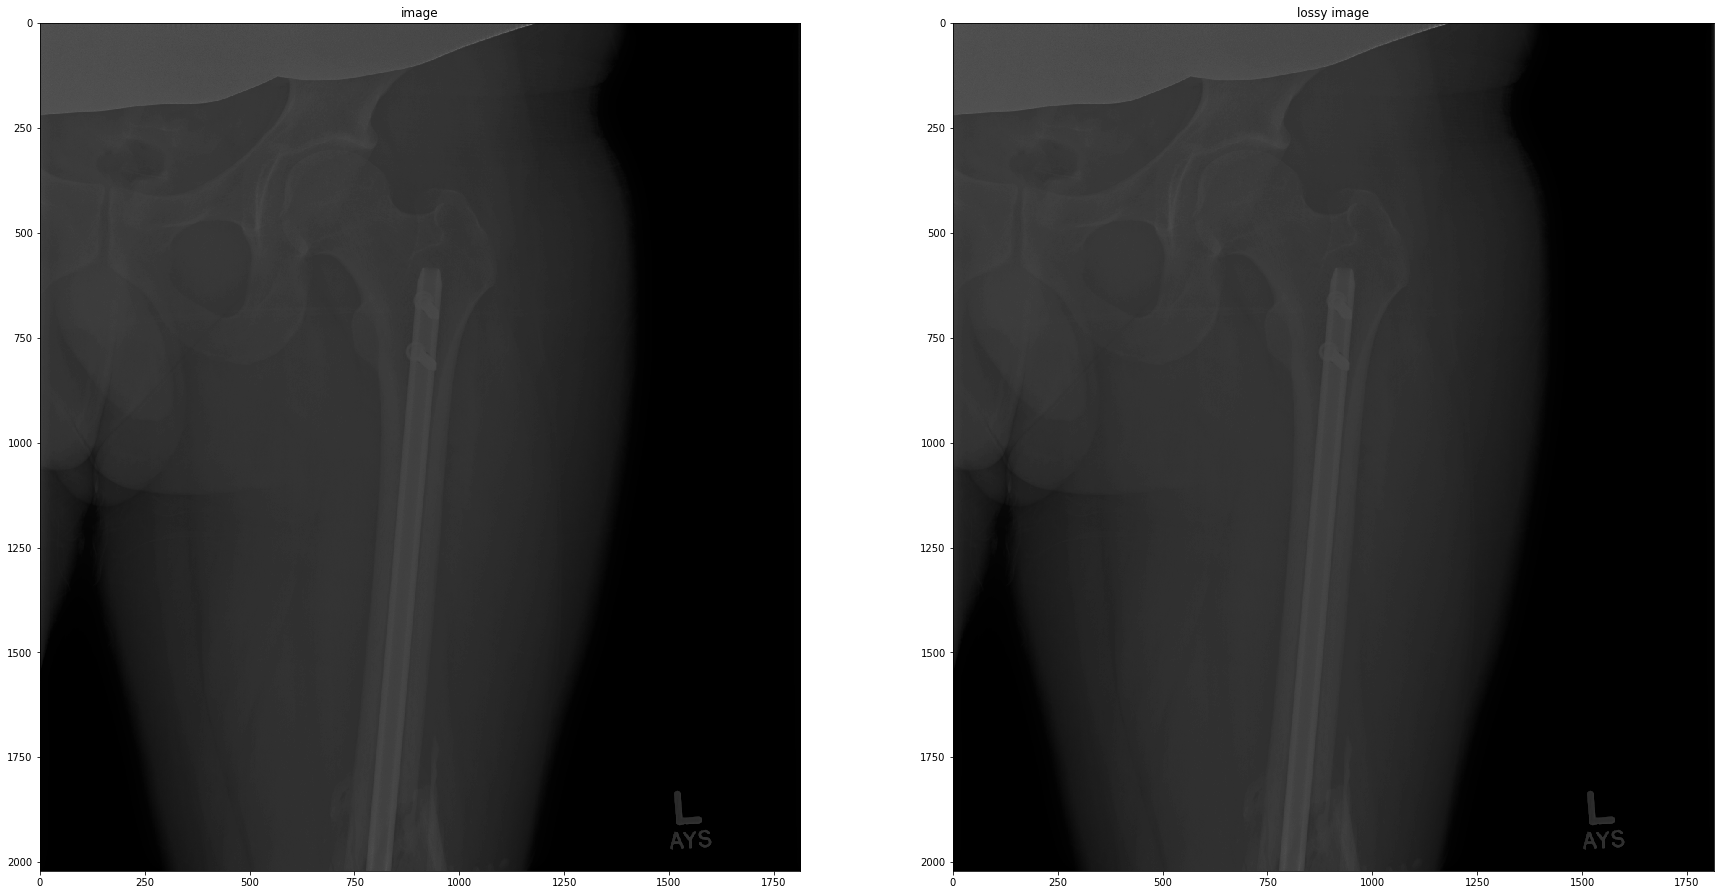

In [65]:
#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00000053/STAI-04055925/2.25.224007947286034398047615710192988937317.dcm'
#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00000052/STAI-40941500/2.25.63080203794180773981606218174535024916.dcm'
#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00000052/STAI-40941500/2.25.292086773195647879915635245498130392299.dcm'
#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00000008/STAI-88668937/2.25.223693969864563681322883460768261280793.dcm'
#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00000146/STAI-74268112/2.25.240589287173111076941644732354274744894.dcm'
#file = '/opt/AIStorage/POSITIVEBREAK/MelissaPositive/STAI-00000058/STAI-37714750/2.25.286225602791282069514226290124179501949.dcm'
#file = '/opt/AIStorage/POSITIVEBREAK/MelissaPositive/STAI-00000058/STAI-37714750/2.25.331132466683482770161939907987063471605.dcm'
#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00000355/STAI-14022634/2.25.93485946825813646137659092994929831075.dcm'

#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00000571/STAI-71094100/2.25.158763468099384888330544864788867338617.dcm'
#file = '/opt/AIStorage/POSITIVEBREAK/MelissaPositive/STAI-00000064/STAI-84589903/2.25.282776297493013728777667459661773576202.dcm'




#probably a fracture, but no associated annotation
#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00001019/STAI-92416959/2.25.130219880488422383881334042430233831363.dcm'

#probably a fracture, but no associated annotation
#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00001019/STAI-92416959/2.25.155068025008568924003375005504400307619.dcm'

#this file is referenced by the annotation dicom
file = '/opt/AIStorage/POSITIVEBREAK/STAI-00001019/STAI-92416959/2.25.211904290918469145111906856660599393535.dcm'

#possibly a fracture, hard to tell but no associated annotation
#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00001019/STAI-92416959/2.25.51770886480559254455053267736917393446.dcm'

print(file)
image_bytes = tf.io.read_file(file)    
image = tfio.image.decode_dicom_image(contents=image_bytes, dtype=tf.uint16)
lossy_image = tfio.image.decode_dicom_image(image_bytes, scale='auto', on_error='lossy', dtype=tf.uint8)

fig, axes = plt.subplots(1,2, figsize=(30,30))
axes[0].imshow(np.squeeze(image.numpy()), cmap='gray')
axes[0].set_title('image')
axes[1].imshow(np.squeeze(lossy_image.numpy()), cmap='gray')
axes[1].set_title('lossy image');

print('')

image.shape

In [45]:
annotations

['/opt/AIStorage/POSITIVEBREAK/STAI-00000355/STAI-18851710/2.25.230327080576180168802477623406389499802.dcm',
 '/opt/AIStorage/POSITIVEBREAK/STAI-00000355/STAI-18851710/2.25.109680495340281197001222362748648164151.dcm',
 '/opt/AIStorage/POSITIVEBREAK/STAI-00000010/STAI-61092579/2.25.14526328268083029875886554782279786117.dcm',
 '/opt/AIStorage/POSITIVEBREAK/STAI-00000010/STAI-61092579/2.25.303176026243598090086020822702268962952.dcm',
 '/opt/AIStorage/POSITIVEBREAK/STAI-00000049/STAI-29626352/2.25.327205220647194948173680797615602094379.dcm',
 '/opt/AIStorage/POSITIVEBREAK/STAI-00000049/STAI-29626352/2.25.269536477544032593286660623921178615084.dcm',
 '/opt/AIStorage/POSITIVEBREAK/STAI-00000278/STAI-59247388/2.25.136022724519573203447223363319871643841.dcm',
 '/opt/AIStorage/POSITIVEBREAK/STAI-00000278/STAI-27467124/2.25.241795963011199542241046507817995746468.dcm',
 '/opt/AIStorage/POSITIVEBREAK/STAI-00000278/STAI-27467124/2.25.121836415314636748389826241510045656802.dcm',
 '/opt/AISt

In [46]:
true_positives

{'/opt/AIStorage/POSITIVEBREAK/STAI-00000432/STAI-61400713/2.25.249549249229705867006614018653989258575.dcm',
 '/opt/AIStorage/POSITIVEBREAK/STAI-00000539/STAI-07712583/2.25.218017783024350481732966255973135001546.dcm',
 '/opt/AIStorage/POSITIVEBREAK/STAI-00000994/STAI-52261653/2.25.36036957369159001647356411076242287918.dcm',
 '/opt/AIStorage/POSITIVEBREAK/STAI-00001104/STAI-74150774/2.25.150118654038696847040818729396460695411.dcm',
 '/opt/AIStorage/POSITIVEBREAK/STAI-00000417/STAI-85210651/2.25.286620616167831749248623831833162554346.dcm',
 '/opt/AIStorage/POSITIVEBREAK/STAI-00000274/STAI-98880156/2.25.167156504616404266020461396372197619718.dcm',
 '/opt/AIStorage/POSITIVEBREAK/STAI-00000376/STAI-61611046/2.25.115528012580129342826212673619561439787.dcm',
 '/opt/AIStorage/POSITIVEBREAK/STAI-00000812/STAI-58626677/2.25.151972619989893075182316297589554081797.dcm',
 '/opt/AIStorage/POSITIVEBREAK/STAI-00000694/STAI-10149353/2.25.248452832766994260275961831340969830937.dcm',
 '/opt/AISt

In [ ]:
'/opt/AIStorage/POSITIVEBREAK/STAI-00001098/STAI-86041290/2.25.154039011689671270742480006722139115188.dcm',
 '/opt/AIStorage/POSITIVEBREAK/STAI-00001017/STAI-77478710/2.25.127287569240014682218619733058632611729.dcm',
 '/opt/AIStorage/POSITIVEBREAK/STAI-00000091/STAI-67089560/2.25.265524321245770427244474647741645302785.dcm',
 '/opt/AIStorage/POSITIVEBREAK/STAI-00000536/STAI-56836180/2.25.315682517342840160705836466698013925451.dcm',
 '/opt/AIStorage/POSITIVEBREAK/STAI-00000261/STAI-36172941/2.25.174396711920050509268316725799365140725.dcm',

/opt/AIStorage/POSITIVEBREAK/STAI-00000261/STAI-36172941/2.25.174396711920050509268316725799365140725.dcm



TensorShape([1, 2140, 1760])

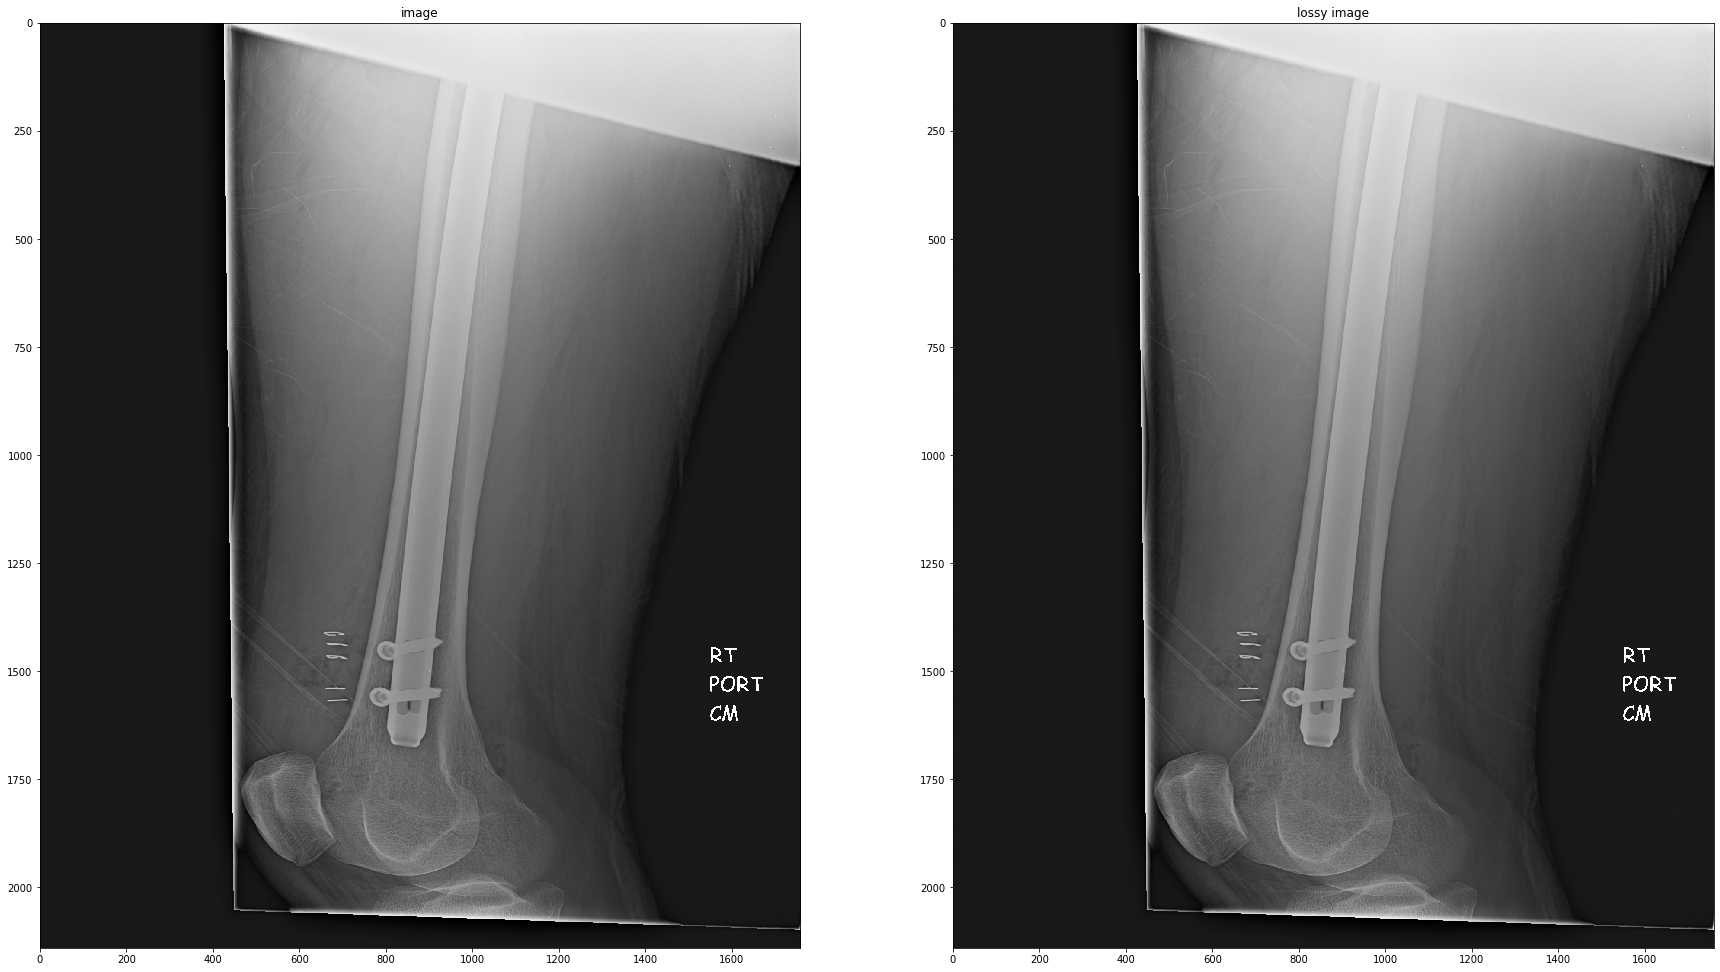

In [71]:
#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00000053/STAI-04055925/2.25.224007947286034398047615710192988937317.dcm'
#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00000052/STAI-40941500/2.25.63080203794180773981606218174535024916.dcm'
#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00000052/STAI-40941500/2.25.292086773195647879915635245498130392299.dcm'
#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00000008/STAI-88668937/2.25.223693969864563681322883460768261280793.dcm'
#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00000146/STAI-74268112/2.25.240589287173111076941644732354274744894.dcm'
#file = '/opt/AIStorage/POSITIVEBREAK/MelissaPositive/STAI-00000058/STAI-37714750/2.25.286225602791282069514226290124179501949.dcm'
#file = '/opt/AIStorage/POSITIVEBREAK/MelissaPositive/STAI-00000058/STAI-37714750/2.25.331132466683482770161939907987063471605.dcm'
#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00000355/STAI-14022634/2.25.93485946825813646137659092994929831075.dcm'

#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00000571/STAI-71094100/2.25.158763468099384888330544864788867338617.dcm'
#file = '/opt/AIStorage/POSITIVEBREAK/MelissaPositive/STAI-00000064/STAI-84589903/2.25.282776297493013728777667459661773576202.dcm'




#probably a fracture, but no associated annotation
#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00001019/STAI-92416959/2.25.130219880488422383881334042430233831363.dcm'

#probably a fracture, but no associated annotation
#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00001019/STAI-92416959/2.25.155068025008568924003375005504400307619.dcm'

#this file is referenced by the annotation dicom
#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00001019/STAI-92416959/2.25.211904290918469145111906856660599393535.dcm'

#possibly a fracture, hard to tell but no associated annotation
#file = '/opt/AIStorage/POSITIVEBREAK/STAI-00001019/STAI-92416959/2.25.51770886480559254455053267736917393446.dcm'

file = '/opt/AIStorage/POSITIVEBREAK/STAI-00000261/STAI-36172941/2.25.174396711920050509268316725799365140725.dcm'

print(file)
image_bytes = tf.io.read_file(file)    
image = tfio.image.decode_dicom_image(contents=image_bytes, dtype=tf.uint16)
lossy_image = tfio.image.decode_dicom_image(image_bytes, scale='auto', on_error='lossy', dtype=tf.uint8)

fig, axes = plt.subplots(1,2, figsize=(30,30))
axes[0].imshow(np.squeeze(image.numpy()), cmap='gray')
axes[0].set_title('image')
axes[1].imshow(np.squeeze(lossy_image.numpy()), cmap='gray')
axes[1].set_title('lossy image');

print('')

image.shape

5748

5748

In [72]:
!ls -al /opt/AIStorage/POSITIVEBREAK/STAI-00001019/STAI-92416959/

total 29000
drwxrws---+ 2 root tandbergai    4096 Jan 27 09:37 .
drwxrws---+ 7 root tandbergai    4096 Jan 27 09:37 ..
-rw-rw----  1 root tandbergai 7372720 Jan 27 09:37 2.25.130219880488422383881334042430233831363.dcm
-rw-rw----  1 root tandbergai 7425262 Jan 27 09:37 2.25.155068025008568924003375005504400307619.dcm
-rw-rw----  1 root tandbergai 7433266 Jan 27 09:37 2.25.211904290918469145111906856660599393535.dcm
-rw-rw----  1 root tandbergai    2000 Jan 27 09:37 2.25.304589190180579357564631626197663875025.dcm
-rw-rw----  1 root tandbergai 7449516 Jan 27 09:37 2.25.51770886480559254455053267736917393446.dcm


In [54]:
    file = '/opt/AIStorage/POSITIVEBREAK/STAI-00001019/STAI-92416959/2.25.304589190180579357564631626197663875025.dcm'
    #file = '/opt/AIStorage/POSITIVEBREAK/STAI-00001019/STAI-92416959/2.25.130219880488422383881334042430233831363.dcm'
    #file = '/opt/AIStorage/POSITIVEBREAK/STAI-00000432/STAI-61400713/2.25.249549249229705867006614018653989258575.dcm'
    image_bytes = tf.io.read_file(file)

    ds = pydicom.dcmread(file)

    
    #try to access the reference
    try:
        path = os.path.dirname(file)
   
        reference = ds[0x0008,0x1115][0][0x0008,0x1140][0][0x0008,0x1155].value
        
        points = ds[0x0070,0x0001][0][0x0070,0x0009][0][0x0070,0x0021].value
        
        box = ds[0x0070,0x0001][0][0x0070,0x0009][0][0x0070,0x0022].value
        
        print(reference)
        print(ds)
        true_positive = path + '/' + reference + '.dcm'
        
        if int(points) < 5:
            print('not enough points for a box', points)
            print(' i: ', true_positive)
            print(' a: ', file)
            print(' box: ', box)
        if int(points) > 5:
            print('multiple anotation')
            print('total points: ', points)
        
    except:
        pass

2.25.211904290918469145111906856660599393535
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Grayscale Softcopy Presentation State Storage
(0008, 0018) SOP Instance UID                    UI: 2.25.304589190180579357564631626197663875025
(0008, 0020) Study Date                          DA: '20180119'
(0008, 0023) Content Date                        DA: '20200127'
(0008, 0030) Study Time                          TM: '154801'
(0008, 0033) Content Time                        TM: '093751.136'
(0008, 0050) Accession Number                    SH: 'STAI-92416959'
(0008, 0060) Modality                            CS: 'PR'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 1010) Station Name                        SH: 'RAD-RIPLAI'
(0008, 1030) Study Description                   LO: 'Ortho Femur 2 V/ >-LT'
(0008, 103e) Series Description                  LO: 'Weasis GSPS'
(0008, 1115)  Referenced Series Sequence   